In [1]:
from glob import glob
import os

mapping = {
    "E1":"CSD20n0A",
    "F1":"CSD20n0B",
    "E2":"CSD20f0A",
    "F2":"CSD20f0B",
    "E3":"CSD20f1A",
    "F3":"CSD20f1B",
    "E4":"CSD20f2A",
    "F4":"CSD20f2B",
    "E5":"CSD20f3A",
    "F5":"CSD20f3B",
    "E6":"CSD23f0A",
    "F6":"CSD23f0B",
    "E7":"CSD25n0A",
    "F7":"CSD25n0B",
    "E8":"CSD25f0A",
    "F8":"CSD25f0B",
    "E9":"CSD25f1A",
    "F9":"CSD25f1B",
    "E10":"CSD26n0A",
    "F10":"CSD26n0B",
    "E11":"CSD26f0A",
    "F11":"CSD26f0B",
    "E12":"CSD26f1A",
    "F12":"CSD26f1B",
    "G1":"CSD26f2A",
    "H1":"CSD26f2B",
    "G2":"CSD26f3A",
    "H2":"CSD26f3B",
}

path = '/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_2/sec_binding/20220329/raw/'
for file_path in glob(path + '*.zip'):
    filename = file_path.split('/')[-1]
    end_name_ind = filename.find(' ')
    filename = filename[:end_name_ind]
    if '_' in filename:
        filename = mapping[filename.split('_')[0]] + 'B'
    else:
        filename = mapping[filename]
    os.rename(file_path, path + filename + '.zip')

KeyError: 'CSD20f2AB.zi'

In [4]:
# Based on akta_hap.py from Ryan Kibler

#!/home/rdkibler/.conda/envs/pycorn_extractor/bin/python3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pycorn import pc_uni6

In [5]:
'''
This script reads all .zip outputs from AKTA Unicorn software and graphs the normalized UV230 trace from 7-20 mL elution volumes. 

To read the zip file outputs from Unicorn Evaluation, I used the pycorn module @ https://github.com/pyahmed/PyCORN. There is also an online visualization tool at http://pycornweb.appspot.com/.
'''


def get_UV(df, uv, normalize=True,xmin = 0,xmax = 999999):
    uv_code = df.columns[df.columns.str.endswith(f"_{uv}")]
    if len(uv_code) == 0:
        raise ValueError(f"UV {uv} not found!")

    vol_label = f'vol {uv}'
    uv_label = f'uv {uv}'

    df = pd.DataFrame([x[0] for x in df[uv_code].values],columns=[vol_label ,uv_label]).dropna()
    df = df[(df[vol_label] >= xmin) & (df[vol_label] <= xmax)]

    if normalize:
        df[uv_label] = (df[uv_label] - min(df[uv_label])) / (max(df[uv_label]) - min(df[uv_label]))

    return df.reset_index(drop=True)


def parse_file(file):
    #loads the zipped files and parses the xml to collect the data. Returns a pandas dataframe
    fdata = pc_uni6(file)
    fdata.load()
    fdata.xml_parse()
    fdata.clean_up()

    return pd.DataFrame().from_dict({key:fdata[key]['data'] for key in fdata.keys()},orient='index').transpose()

In [6]:
protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-03-02_CSD_round2_mpnn_redesign/protparams.csv')
protparams_df

,Gene ID,Sequence,Molecular Weight,Monoisotopic Molecular Weight,Reduced Molar Extinction Coefficient,Oxidized Molar Extinction Coefficient,Reduced Mass Extinction Coefficient,Oxidized Mass Extinction Coefficient,Isoelectric Point,Instability Index,Aromaticity,Gravy,Charge at pH 8
0,CSD20f0A.pdb,MSGAAIEDAIELLRELAELAERLGDEETAEVAREVARLVEERGDEG...,19704.0572,19692.4809,5500,5500,0.279130,0.279130,5.4610,25.6060,0.0109,-0.2257,-9.8957
1,CSD20f0B.pdb,MSGEALRRAEERLEELAELAERLGDEEVAALAREVRERVRRVGDEE...,20474.8202,20462.9682,11000,11000,0.537245,0.537245,6.2735,49.0175,0.0109,-0.4306,-3.8280
2,CSD20f1A.pdb,MSGSAIERAQRLLEELAEEAARLGDEETAELAREVRRLVAERGDEE...,20024.1944,20012.6350,5500,5500,0.274668,0.274668,6.1006,44.3175,0.0055,-0.4464,-4.8280
3,CSD20f1B.pdb,MSGAELRAAQETLRRLAELAARRGDEEVAELAREVRERVARVGDEE...,20354.6221,20342.8518,11000,11000,0.540418,0.540418,6.4673,45.5546,0.0109,-0.4361,-2.8289
4,CSD20f2A.pdb,MSGSAIEDAQRLLEELARLARELGDEGTARLAREVRRLVREKGDEK...,19867.1462,19855.6366,5500,5500,0.276839,0.276839,6.2657,31.2475,0.0055,-0.3432,-3.8578
5,CSD20f2B.pdb,MSGSYLEEAIERLEELAELAAERGDEEVAELAREVKERVAKVGDEY...,20206.6549,20194.7164,15470,15470,0.765589,0.765589,5.3375,40.2546,0.0273,-0.1426,-10.8963
6,CSD20n0A.pdb,MSGSVIERAQELLEELAELAEEQGDQEVAEAAREVSELVKRKGDEK...,19672.0483,19660.4573,6990,6990,0.355326,0.355326,6.0953,29.4710,0.0164,-0.3568,-4.9851
7,CSD20n0B.pdb,MSGDELEKAIQTLKRLAELAEEQGDQEVADLAREVSERVKRVGDDL...,20147.4967,20135.6164,11000,11000,0.545974,0.545974,5.1546,42.7415,0.0164,-0.2361,-13.8962
8,CSD20f3A.pdb,MSGEVIERARRLLRELADLAEERGDEGVAAAAREVERLVAERGDRE...,19608.7758,19597.3973,5500,5500,0.280487,0.280487,5.4650,20.5087,0.0055,-0.2710,-9.8761
9,CSD20f3B.pdb,MSGDALERAERRLEELAELAERLGDEEVARRAREVKERVRRVRDDR...,20578.9564,20567.0394,5500,5500,0.267263,0.267263,5.8191,45.1142,0.0055,-0.4568,-6.8473


Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f0A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f0B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f0AB.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f1A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f1B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': 

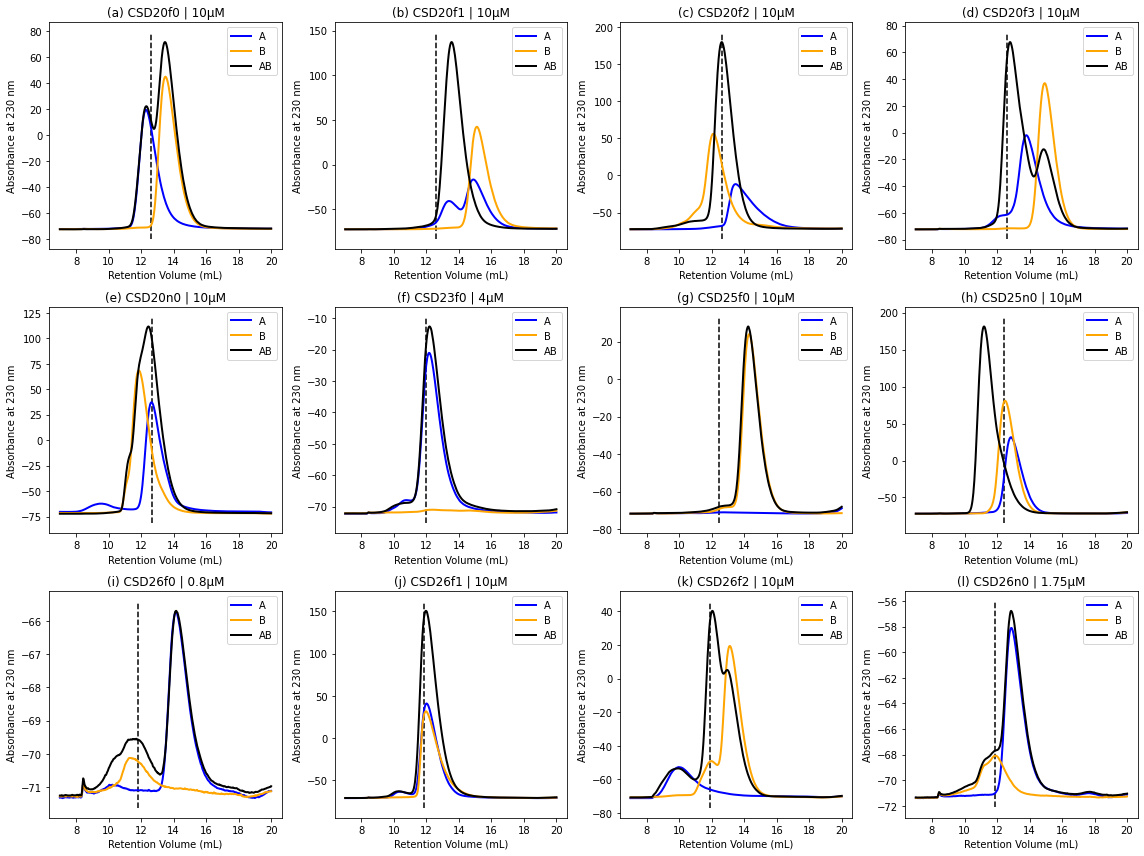

In [4]:
des_names = ['CSD20f0', 'CSD20f1', 'CSD20f2', 'CSD20f3', 'CSD20n0', 'CSD23f0', 'CSD25f0', 'CSD25n0', 'CSD26f0', 'CSD26f1', 'CSD26f2', 'CSD26n0']
fig_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
concs = ['10', '10', '10', '10', '10', '4', '10', '10', '0.8', '10', '10', '1.75']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-03-02_CSD_round2_mpnn_redesign/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(3, 4, figsize=(16,12))

xmin = 7.0
xmax = 20.0

uvs = ['230']

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, conc, letter, ax in zip(des_names, concs, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        
        df = pd.DataFrame()

        for uv in uvs:
            try:
                df = pd.concat([df,get_UV(full_df, uv, False, xmin, xmax)],axis="columns",ignore_index=False)
            except ValueError:
                print(f'UV {uv} not found in file {file}! Skipping!')
        if df.empty:
            print(f"unable to extract any data from {file}")
            continue

        print(f'Processing png for {file} with UV {", UV ".join(uvs)} from {xmin} to {xmax} mL')
        
        #graph data

        #use column name data instead of args.uv because some of the UVs may have failed
        for uv_label in df.columns[df.columns.str.contains("uv")]:

            vol_label = uv_label.replace("uv","vol")
            df_plot = df[[uv_label,vol_label]]

            df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, color=colors[color_counter], label=combo, linewidth=2)

            color_counter += 1

    # xticks = ax.get_xticks()
    # xticklabels = ax.get_xticklabels()
    # # xticks = np.concatenate((xticks, np.asarray(vols)))
    # # xticklabels += ['A', 'AA', 'B', 'BB', 'AB']
    # xticks = np.concatenate((xticks, np.asarray(vols)))
    # xticklabels += ['Monomer', 'Dimer']
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticklabels)
    # ax.set_xticks(vols)
    # ax.set_xticklabels(['Monomer', 'Dimer'])
    ax.set_xticks(np.arange(8, 22, 2))

    ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} | {conc}μM')
        
fig.tight_layout()
fig.savefig("csd_binding.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230     uv 230
0      7.000284 -72.125916
1      7.006922 -72.124756
2      7.013559 -72.122772
3      7.020432 -72.122826
4      7.027070 -72.125206
...         ...        ...
1952  19.970150 -71.891510
1953  19.976786 -71.892288
1954  19.983423 -71.891640
1955  19.990290 -71.889351
1956  19.996922 -71.886139

[1957 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230     uv 230
0      7.000297 -72.258377
1      7.006933 -72.258820
2      7.013585 -72.260147
3      7.020439 -72.260742
4      7.027077 -72.261124
...         ...        ...
1952  19.970364 -72.000450
1953  19.976997 -71.998497
1954  19.983837 -71.998070
1955  19.990498 -71.998123
1956  19.997133 -71.996727

[1957 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0

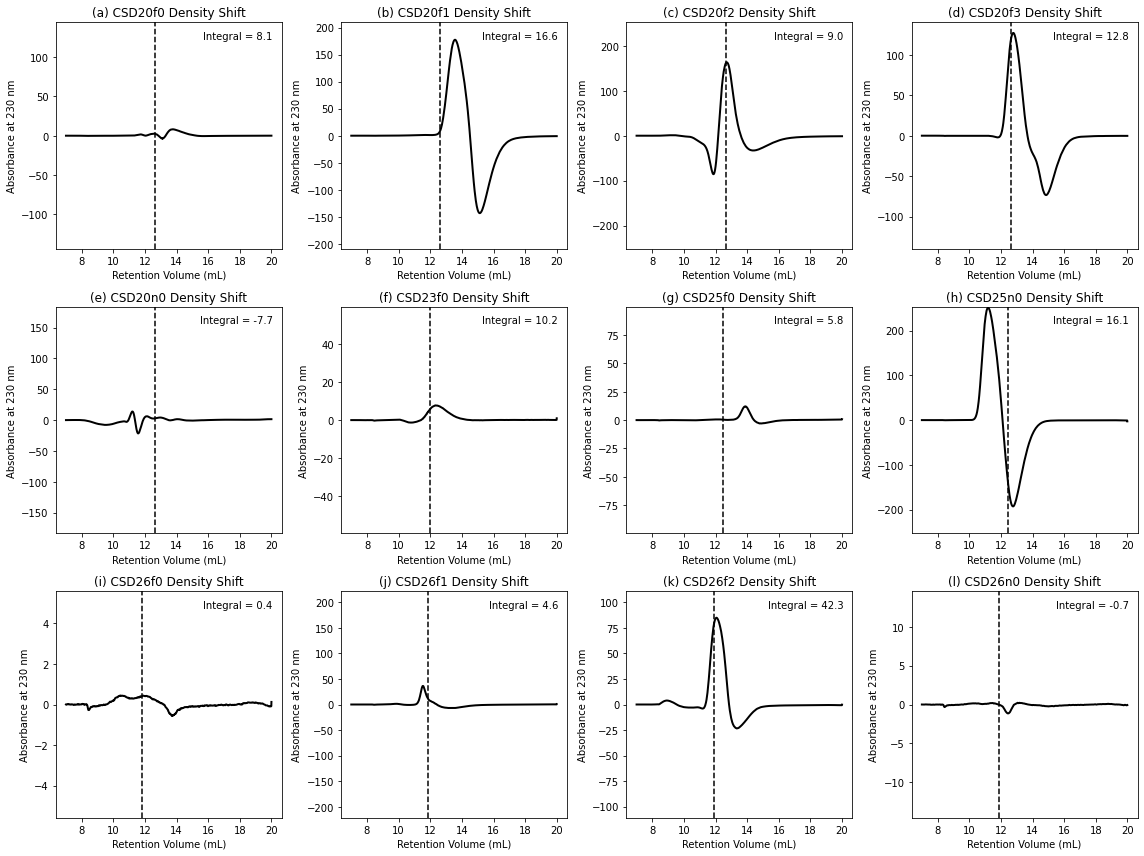

In [5]:
des_names = ['CSD20f0', 'CSD20f1', 'CSD20f2', 'CSD20f3', 'CSD20n0', 'CSD23f0', 'CSD25f0', 'CSD25n0', 'CSD26f0', 'CSD26f1', 'CSD26f2', 'CSD26n0']
fig_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
concs = ['10', '10', '10', '10', '10', '4', '10', '10', '0.8', '10', '10', '1.75']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-03-02_CSD_round2_mpnn_redesign/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(3, 4, figsize=(16,12))

xmin = 7.0
xmax = 20.0

uv = '230'

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, letter, ax in zip(des_names, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    combined_uv = pd.Series(dtype='float64')

    vol_len = 0
    max_signal = 0
    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        df = get_UV(full_df, uv, False, xmin, xmax)
        print(df)
        
        #graph data

        uv_signal = df['uv ' + uv]
        uv_signal = uv_signal - uv_signal.iloc[0] # subtract baseline
    
        if combo == 'AB':
            combined_uv = combined_uv.add(uv_signal, fill_value=0)
        else:
            combined_uv = combined_uv.sub(uv_signal, fill_value=0)

        if len(df['vol ' + uv]) > vol_len:
            vols = df['vol ' + uv]
            vol_len = len(vols)
        if uv_signal.max() > max_signal:
            max_signal = uv_signal.max()

    ax.plot(vols, combined_uv, color=colors[2], linewidth=2) # if this fails because the x and y vectors don't match, could be because some of the UVs have one more data point than the others

    # integral = np.trapz(combined_uv - combined_uv.iloc[0], vols) # subtracts the baseline and integrates
    integral = np.trapz(combined_uv, vols) # subtracts the baseline and integrates

    ax.set_xticks(np.arange(8, 22, 2))
    ax.set_ylim(-max_signal, max_signal)
    ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.text(0.96, 0.94, f'Integral = {integral:.01f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} Density Shift')
        
fig.tight_layout()
fig.savefig("csd_binding_density_shift.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f1A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f1B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f1AB.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f3A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f3B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': 

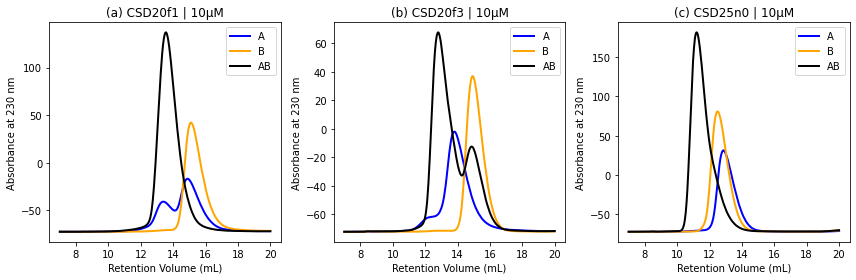

In [8]:
des_names = ['CSD20f1', 'CSD20f3', 'CSD25n0']
fig_letters = ['a', 'b', 'c']
concs = ['10', '10', '10']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-03-02_CSD_round2_mpnn_redesign/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(1, 3, figsize=(12,4))

xmin = 7.0
xmax = 20.0

uvs = ['230']

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, conc, letter, ax in zip(des_names, concs, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        
        df = pd.DataFrame()

        for uv in uvs:
            try:
                df = pd.concat([df,get_UV(full_df, uv, False, xmin, xmax)],axis="columns",ignore_index=False)
            except ValueError:
                print(f'UV {uv} not found in file {file}! Skipping!')
        if df.empty:
            print(f"unable to extract any data from {file}")
            continue

        print(f'Processing png for {file} with UV {", UV ".join(uvs)} from {xmin} to {xmax} mL')
        
        #graph data

        #use column name data instead of args.uv because some of the UVs may have failed
        for uv_label in df.columns[df.columns.str.contains("uv")]:

            vol_label = uv_label.replace("uv","vol")
            df_plot = df[[uv_label,vol_label]]

            df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, color=colors[color_counter], label=combo, linewidth=2)

            color_counter += 1

    # xticks = ax.get_xticks()
    # xticklabels = ax.get_xticklabels()
    # # xticks = np.concatenate((xticks, np.asarray(vols)))
    # # xticklabels += ['A', 'AA', 'B', 'BB', 'AB']
    # xticks = np.concatenate((xticks, np.asarray(vols)))
    # xticklabels += ['Monomer', 'Dimer']
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticklabels)
    # ax.set_xticks(vols)
    # ax.set_xticklabels(['Monomer', 'Dimer'])
    ax.set_xticks(np.arange(8, 22, 2))

    # ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} | {conc}μM')
        
fig.tight_layout()
fig.savefig("good_csd_binding.png", dpi=300, bbox_inches='tight')

In [ ]:
des_names = ['CSD20f1', 'CSD20f3', 'CSD25n0']
fig_letters = ['a', 'b', 'c']
concs = ['10', '10', '10']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-03-02_CSD_round2_mpnn_redesign/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(1, 3, figsize=(12,4))

xmin = 7.0
xmax = 20.0

uvs = ['230']

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, conc, letter, ax in zip(des_names, concs, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        
        df = pd.DataFrame()

        for uv in uvs:
            try:
                df = pd.concat([df,get_UV(full_df, uv, False, xmin, xmax)],axis="columns",ignore_index=False)
            except ValueError:
                print(f'UV {uv} not found in file {file}! Skipping!')
        if df.empty:
            print(f"unable to extract any data from {file}")
            continue

        print(f'Processing png for {file} with UV {", UV ".join(uvs)} from {xmin} to {xmax} mL')
        
        #graph data

        #use column name data instead of args.uv because some of the UVs may have failed
        for uv_label in df.columns[df.columns.str.contains("uv")]:

            vol_label = uv_label.replace("uv","vol")
            df_plot = df[[uv_label,vol_label]]

            df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, color=colors[color_counter], label=combo, linewidth=2)

            color_counter += 1

    # xticks = ax.get_xticks()
    # xticklabels = ax.get_xticklabels()
    # # xticks = np.concatenate((xticks, np.asarray(vols)))
    # # xticklabels += ['A', 'AA', 'B', 'BB', 'AB']
    # xticks = np.concatenate((xticks, np.asarray(vols)))
    # xticklabels += ['Monomer', 'Dimer']
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticklabels)
    # ax.set_xticks(vols)
    # ax.set_xticklabels(['Monomer', 'Dimer'])
    ax.set_xticks(np.arange(8, 22, 2))

    # ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} | {conc}μM')
        
fig.tight_layout()
fig.savefig("good_csd_binding.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230     uv 230
0      7.000294 -72.300201
1      7.007152 -72.300972
2      7.013807 -72.301453
3      7.020446 -72.300667
4      7.027082 -72.297981
...         ...        ...
1952  19.970369 -71.793587
1953  19.977232 -71.793373
1954  19.983862 -71.794907
1955  19.990499 -71.794456
1956  19.997143 -71.792534

[1957 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230     uv 230
0      7.000331 -72.403244
1      7.007188 -72.402794
2      7.013826 -72.402077
3      7.020462 -72.403221
4      7.027098 -72.404663
...         ...        ...
1952  19.970598 -71.485397
1953  19.977234 -71.484566
1954  19.983868 -71.485306
1955  19.990511 -71.487976
1956  19.997147 -71.487000

[1957 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0

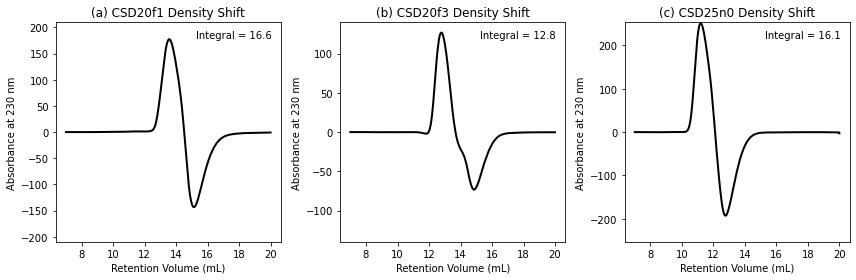

In [10]:
des_names = ['CSD20f1', 'CSD20f3', 'CSD25n0']
fig_letters = ['a', 'b', 'c']
concs = ['10', '10', '10']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-03-02_CSD_round2_mpnn_redesign/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(1, 3, figsize=(12,4))

xmin = 7.0
xmax = 20.0

uv = '230'

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, letter, ax in zip(des_names, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    combined_uv = pd.Series(dtype='float64')

    vol_len = 0
    max_signal = 0
    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        df = get_UV(full_df, uv, False, xmin, xmax)
        print(df)
        
        #graph data

        uv_signal = df['uv ' + uv]
        uv_signal = uv_signal - uv_signal.iloc[0] # subtract baseline
    
        if combo == 'AB':
            combined_uv = combined_uv.add(uv_signal, fill_value=0)
        else:
            combined_uv = combined_uv.sub(uv_signal, fill_value=0)

        if len(df['vol ' + uv]) > vol_len:
            vols = df['vol ' + uv]
            vol_len = len(vols)
        if uv_signal.max() > max_signal:
            max_signal = uv_signal.max()

    ax.plot(vols, combined_uv, color=colors[2], linewidth=2) # if this fails because the x and y vectors don't match, could be because some of the UVs have one more data point than the others

    # integral = np.trapz(combined_uv - combined_uv.iloc[0], vols) # subtracts the baseline and integrates
    integral = np.trapz(combined_uv, vols) # subtracts the baseline and integrates

    ax.set_xticks(np.arange(8, 22, 2))
    ax.set_ylim(-max_signal, max_signal)
    # ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.text(0.96, 0.94, f'Integral = {integral:.01f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} Density Shift')
        
fig.tight_layout()
fig.savefig("good_csd_binding_density_shift.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f3A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f3B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f3AB.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD25n0A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD25n0B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': 

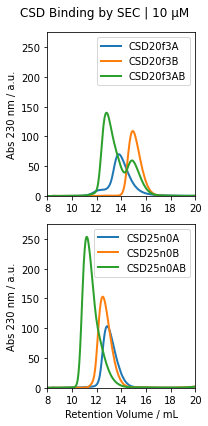

In [13]:
des_names = ['CSD20f3', 'CSD25n0']
concs = ['10', '10']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-03-02_CSD_round2_mpnn_redesign/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(2, 1, figsize=(3, 6))

xmin = 7.0
xmax = 20.0

uvs = ['230']

colors = ['C0', 'C1', 'C2']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for ax_i, (des_name, conc, ax) in enumerate(zip(des_names, concs, axs.flatten())):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]
    names = [des_name + combo for combo in combos]

    for file, name in zip(files, names):

        #grab the entire dataset
        full_df = parse_file(file)
        
        df = pd.DataFrame()

        for uv in uvs:
            try:
                df = pd.concat([df,get_UV(full_df, uv, False, xmin, xmax)],axis="columns",ignore_index=False)
            except ValueError:
                print(f'UV {uv} not found in file {file}! Skipping!')
        if df.empty:
            print(f"unable to extract any data from {file}")
            continue

        print(f'Processing png for {file} with UV {", UV ".join(uvs)} from {xmin} to {xmax} mL')
        
        #graph data

        #use column name data instead of args.uv because some of the UVs may have failed
        for uv_label in df.columns[df.columns.str.contains("uv")]:

            vol_label = uv_label.replace("uv","vol")
            df_plot = df[[uv_label,vol_label]]
            df_plot[uv_label] = df_plot[uv_label] - df_plot[uv_label].iloc[0]

            df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, color=colors[color_counter], label=name, linewidth=2)

            color_counter += 1

    ax.set_xticks(np.arange(8, 22, 2))

    if ax_i >= 1:
        ax.set_xlabel('Retention Volume / mL')
    else:
        ax.set_xlabel(None)
    if ax_i % 1 == 0:
        ax.set_ylabel('Abs 230 nm / a.u.')
    else:
        ax.set_ylabel(None)
    ax.legend(loc='upper right')
    ax.set_xlim(8, 20)
    ax.set_ylim(0, 275)
        
fig.suptitle("CSD Binding by SEC | 10 μM")
fig.tight_layout()
fig.patch.set_alpha(0)
fig.savefig("good_csd_binding_vert_poster.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f3A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f3B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20f3AB.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD25n0A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD25n0B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': 

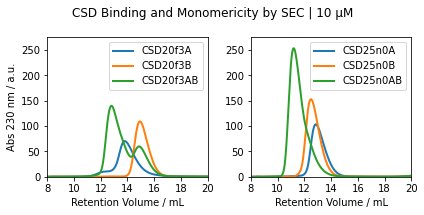

In [17]:
des_names = ['CSD20f3', 'CSD25n0']
concs = ['10', '10']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-03-02_CSD_round2_mpnn_redesign/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(1, 2, figsize=(6, 3))

xmin = 7.0
xmax = 20.0

uvs = ['230']

colors = ['C0', 'C1', 'C2']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for ax_i, (des_name, conc, ax) in enumerate(zip(des_names, concs, axs.flatten())):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]
    names = [des_name + combo for combo in combos]

    for file, name in zip(files, names):

        #grab the entire dataset
        full_df = parse_file(file)
        
        df = pd.DataFrame()

        for uv in uvs:
            try:
                df = pd.concat([df,get_UV(full_df, uv, False, xmin, xmax)],axis="columns",ignore_index=False)
            except ValueError:
                print(f'UV {uv} not found in file {file}! Skipping!')
        if df.empty:
            print(f"unable to extract any data from {file}")
            continue

        print(f'Processing png for {file} with UV {", UV ".join(uvs)} from {xmin} to {xmax} mL')
        
        #graph data

        #use column name data instead of args.uv because some of the UVs may have failed
        for uv_label in df.columns[df.columns.str.contains("uv")]:

            vol_label = uv_label.replace("uv","vol")
            df_plot = df[[uv_label,vol_label]]
            df_plot[uv_label] = df_plot[uv_label] - df_plot[uv_label].iloc[0]

            df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, color=colors[color_counter], label=name, linewidth=2)

            color_counter += 1

    ax.set_xticks(np.arange(8, 22, 2))

    if ax_i >= 0:
        ax.set_xlabel('Retention Volume / mL')
    else:
        ax.set_xlabel(None)
    if ax_i % 2 == 0:
        ax.set_ylabel('Abs 230 nm / a.u.')
    else:
        ax.set_ylabel(None)
    ax.legend(loc='upper right')
    ax.set_xlim(8, 20)
    ax.set_ylim(0, 275)
        
fig.suptitle("CSD Binding and Monomericity by SEC | 10 μM")
fig.tight_layout()
fig.patch.set_alpha(0)
fig.savefig("good_csd_binding_hori_poster.png", dpi=300, bbox_inches='tight')

## Old

In [34]:
# plot sap against homodimerization

import pandas as pd

des_names = ['CSD16', 'CSD19', 'CSD20', 'CSD21', 'CSD22', 'CSD23', 'CSD24', 'CSD25', 'CSD26', 'CSD27']
design_dict = {
    'CSD16A': ('aggregate', 'nonworking'),
    'CSD16B': ('aggregate', 'nonworking'),
    'CSD19A': ('aggregate', 'nonworking'),
    'CSD19B': ('aggregate', 'nonworking'),
    'CSD20A': ('monomer', 'working'),
    'CSD20B': ('aggregate', 'working'),
    'CSD21A': ('monomer', 'nonworking'),
    'CSD21B': ('monomer', 'nonworking'),
    'CSD22A': ('monomer', 'nonworking'),
    'CSD22B': ('monomer', 'nonworking'),
    'CSD23A': ('monomer', 'working'),
    'CSD23B': ('aggregate', 'working'),
    'CSD24A': ('monomer', 'nonworking'),
    'CSD24B': ('aggregate', 'nonworking'),
    'CSD25A': ('monomer', 'working'),
    'CSD25B': ('aggregate', 'working'),
    'CSD26A': ('monomer', 'working'),
    'CSD26B': ('monomer', 'working'),
    'CSD27A': ('monomer', 'nonworking'),
    'CSD27B': ('monomer', 'nonworking')
}
design_df = pd.DataFrame.from_dict(design_dict, orient='index', columns=['alone_state', 'function'])
design_df

,alone_state,function
CSD16A,aggregate,nonworking
CSD16B,aggregate,nonworking
CSD19A,aggregate,nonworking
CSD19B,aggregate,nonworking
CSD20A,monomer,working
CSD20B,aggregate,working
CSD21A,monomer,nonworking
CSD21B,monomer,nonworking
CSD22A,monomer,nonworking
CSD22B,monomer,nonworking


In [35]:
from glob import glob

sap_monomer_df = pd.DataFrame(index=design_df.index, columns=['sap_X'])

# get the saps from the score line at the bottom of the pdbs... yeah...
for des_name in des_names:
    pdb_path = glob('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-01-05_CSD_round2/designs/' + des_name + '*.pdb')[0]
    
    with open(pdb_path, 'r') as pdb_file:
        for line in pdb_file.readlines():
            if line.startswith('sap_A_X'):
                # rstrip removes terminal spaces, so line_split will only have more than one element if this line lists some clash-resolved resis
                line_split = line.rstrip().split(' ')
                if len(line_split) > 1:
                    sap_monomer_df.loc[des_name + 'A', 'sap_X'] = float(line_split[1])
            elif line.startswith('sap_B_X'):
                # rstrip removes terminal spaces, so line_split will only have more than one element if this line lists some clash-resolved resis
                line_split = line.rstrip().split(' ')
                if len(line_split) > 1:
                    sap_monomer_df.loc[des_name + 'B', 'sap_X'] = float(line_split[1])

design_df = pd.concat([design_df, sap_monomer_df], axis=1)
design_df

,alone_state,function,sap_X
CSD16A,aggregate,nonworking,23.2523
CSD16B,aggregate,nonworking,11.2656
CSD19A,aggregate,nonworking,28.0017
CSD19B,aggregate,nonworking,25.3822
CSD20A,monomer,working,19.0621
CSD20B,aggregate,working,26.7507
CSD21A,monomer,nonworking,18.4194
CSD21B,monomer,nonworking,17.3895
CSD22A,monomer,nonworking,17.3482
CSD22B,monomer,nonworking,20.4288


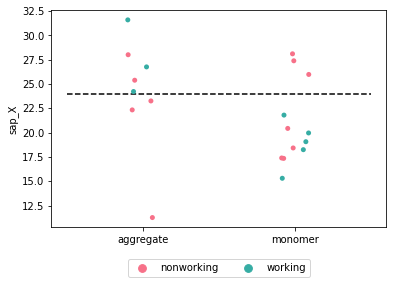

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.scatterplot(x='alone_state', y='sap_X', data=design_df, hue='working', palette='husl')

# fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.stripplot(
    # ax=ax,
    x="alone_state",
    y="sap_X",
    data=design_df,
    hue='function',
    palette='husl'
)

ax.set_xlabel('')
ax.plot(ax.get_xlim(), [24, 24], '--', color='black', zorder=0)
plt.legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5,-0.25))
plt.savefig("csd_alone_state_vs_sap.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD20AB.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD23A.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Processing png for raw/CSD23B.zip with UV 230 from 7.0 to 20.0 mL
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473

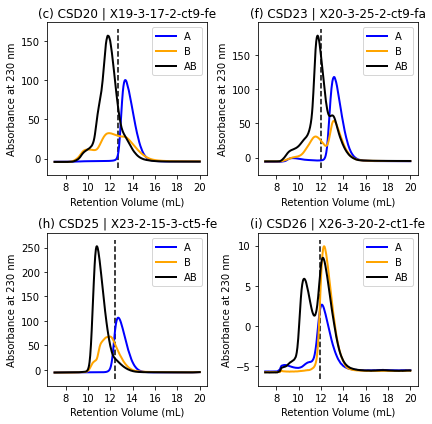

In [6]:
des_names = ['CSD20', 'CSD23', 'CSD25', 'CSD26']
parents = ['X19-3-17-2-ct9-fe', 'X20-3-25-2-ct9-fa', 'X23-2-15-3-ct5-fe', 'X26-3-20-2-ct1-fe']
fig_letters = ['c', 'f', 'h', 'i']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-01-05_CSD_round2/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(2, 2, figsize=(6,6))

xmin = 7.0
xmax = 20.0

uvs = ['230']

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, parent, letter, ax in zip(des_names, parents, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        
        df = pd.DataFrame()

        for uv in uvs:
            try:
                df = pd.concat([df,get_UV(full_df, uv, False, xmin, xmax)],axis="columns",ignore_index=False)
            except ValueError:
                print(f'UV {uv} not found in file {file}! Skipping!')
        if df.empty:
            print(f"unable to extract any data from {file}")
            continue

        print(f'Processing png for {file} with UV {", UV ".join(uvs)} from {xmin} to {xmax} mL')
        
        #graph data

        #use column name data instead of args.uv because some of the UVs may have failed
        for uv_label in df.columns[df.columns.str.contains("uv")]:

            vol_label = uv_label.replace("uv","vol")
            df_plot = df[[uv_label,vol_label]]

            df_plot.plot.line(x=vol_label, y=uv_label, ax=ax, color=colors[color_counter], label=combo, linewidth=2)

            color_counter += 1

    # xticks = ax.get_xticks()
    # xticklabels = ax.get_xticklabels()
    # # xticks = np.concatenate((xticks, np.asarray(vols)))
    # # xticklabels += ['A', 'AA', 'B', 'BB', 'AB']
    # xticks = np.concatenate((xticks, np.asarray(vols)))
    # xticklabels += ['Monomer', 'Dimer']
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xticklabels)
    # ax.set_xticks(vols)
    # ax.set_xticklabels(['Monomer', 'Dimer'])
    ax.set_xticks(np.arange(8, 22, 2))

    ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} | {parent}')
        
fig.tight_layout()
fig.savefig("csd_binding_working.png", dpi=300, bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230    uv 230
0      7.000528 -3.903615
1      7.007164 -3.899578
2      7.013798 -3.897440
3      7.020438 -3.901644
4      7.027080 -3.904827
...         ...       ...
1952  19.970604 -3.554120
1953  19.977243 -3.554780
1954  19.983883 -3.556757
1955  19.990519 -3.560156
1956  19.997156 -3.562728

[1957 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
        vol 230    uv 230
0      7.005609 -4.107002
1      7.012247 -4.106202
2      7.018884 -4.107251
3      7.025517 -4.107760
4      7.032154 -4.109167
...         ...       ...
1951  19.969036 -3.423423
1952  19.975672 -3.423269
1953  19.982304 -3.422602
1954  19.988945 -3.422327
1955  19.995586 -3.423089

[1956 rows x 2 columns]
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data

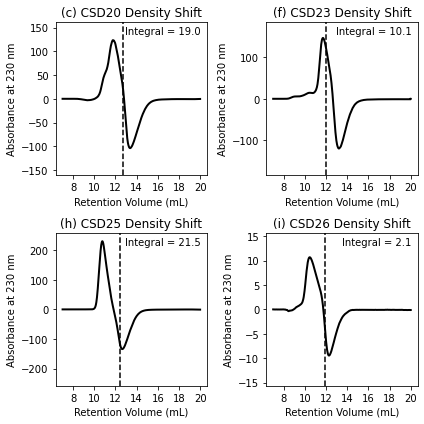

In [9]:
des_names = ['CSD20', 'CSD23', 'CSD25', 'CSD26']
parents = ['X19-3-17-2-ct9-fe', 'X20-3-25-2-ct9-fa', 'X23-2-15-3-ct5-fe', 'X26-3-20-2-ct1-fe']
fig_letters = ['c', 'f', 'h', 'i']

protparams_df = pd.read_csv('/home/broerman/wetlab/gene_orders/dimeric_hinges/2022-01-05_CSD_round2/protparams.csv')

# finds the averages of the centers of the predicted monomer and dimer regions- this is the division between those regions
# sep_vols = [np.mean((np.mean((vols[0], vols[2])), vols[4])) for vols in elu_vols]

#initialize graph
fig,axs = plt.subplots(2, 2, figsize=(6,6))

xmin = 7.0
xmax = 20.0

uv = '230'

colors = ['blue', 'orange', 'black', 'green', 'magenta', 'yellow', 'red', 'purple', 'cyan', 'wheat', 'grey', 'pink', 'brown', 'springgreen','dodgerblue','darkslategray','darkblue','gainsboro','palegreen', 'crimson', 'lime', 'lightgrey','coral','chocolate']

#get specific zip file, otherwise run on all zips in directory
combos = ['A', 'B', 'AB']

for des_name, parent, letter, ax in zip(des_names, parents, fig_letters, axs.flatten()):
    color_counter = 0

    des_inds = protparams_df['Gene ID'].str.startswith(des_name)
    # des_df.loc[:,'homodimer_MW'] = 2*des_df.loc[:,'Molecular Weight']
    protparams_df.loc[des_inds,'monomer_elution'] = (11.18-13.99)/(44-17)*(protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    protparams_df.loc[des_inds,'homodimer_elution'] = (11.18-13.99)/(44-17)*(2*protparams_df.loc[des_inds,'Molecular Weight']/1000-17)+13.99
    sep_vol = (protparams_df.loc[des_inds,'monomer_elution'].mean() + protparams_df.loc[des_inds,'homodimer_elution'].mean())/2
    

    files = ['raw/' + des_name + combo + '.zip' for combo in combos]

    combined_uv = pd.Series(dtype='float64')

    vol_len = 0
    max_signal = 0
    for file, combo in zip(files, combos):

        #grab the entire dataset
        full_df = parse_file(file)
        df = get_UV(full_df, uv, False, xmin, xmax)
        print(df)
        
        #graph data

        uv_signal = df['uv ' + uv]
        uv_signal = uv_signal - uv_signal.iloc[0] # subtract baseline
    
        if combo == 'AB':
            combined_uv = combined_uv.add(uv_signal, fill_value=0)
        else:
            combined_uv = combined_uv.sub(uv_signal, fill_value=0)

        if len(df['vol ' + uv]) > vol_len:
            vols = df['vol ' + uv]
            vol_len = len(vols)
        if uv_signal.max() > max_signal:
            max_signal = uv_signal.max()

    ax.plot(vols, combined_uv, color=colors[2], linewidth=2) # if this fails because the x and y vectors don't match, could be because some of the UVs have one more data point than the others

    # integral = np.trapz(combined_uv - combined_uv.iloc[0], vols) # subtracts the baseline and integrates
    integral = np.trapz(combined_uv, vols) # subtracts the baseline and integrates

    ax.set_xticks(np.arange(8, 22, 2))
    ax.set_ylim(-max_signal, max_signal)
    ax.plot([sep_vol, sep_vol], ax.get_ylim(), '--', color='black', zorder=0)
    ax.text(0.96, 0.94, f'Integral = {integral:.01f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel('Retention Volume (mL)')
    ax.set_ylabel('Absorbance at 230 nm')
    ax.set_title(f'({letter}) {des_name} Density Shift')
        
fig.tight_layout()
fig.savefig("csd_binding_density_shift_working.png", dpi=300, bbox_inches='tight')